## GETTING LIBRARIES AND DATA

**Importing the necessary libraries**

In [1]:
# Base libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import BASE_COLORS

%matplotlib inline

# Modelling
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


#warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

**Loading the data into a variable**

In [2]:
data = pd.read_csv('regression_data_clean.csv')

## EXPLORING

**Taking a look at the main features**

In [3]:
data.shape

(21597, 21)

In [4]:
data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [5]:
data[['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15']]

,sqft_living,sqft_lot,sqft_living15,sqft_lot15
0,1180,5650,1340,5650
1,2570,7242,1690,7639
2,770,10000,2720,8062
3,1960,5000,1360,5000
4,1680,8080,1800,7503
...,...,...,...,...
21592,1530,1131,1530,1509
21593,2310,5813,1830,7200
21594,1020,1350,1020,2007
21595,1600,2388,1410,1287


As we can see the columns sqft_living and sqft_lot contains the old values and sqft_living15 and sqft_lot15 we find the new values for the houses. There we'll keep the newest features.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

**Looking for duplicates in id column**

In [7]:
duplicateRowsDF = data[data.duplicated(['id'])]

In [8]:
duplicateRowsDF

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
94,6021501535,12/23/14,3,1.50,1580,5000,1.0,0,0,3,...,1290,290,1939,0,98117,47.6870,-122.386,1570,4500,700000
314,4139480200,12/9/14,4,3.25,4290,12103,1.0,0,3,3,...,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244,1400000
325,7520000520,3/11/15,2,1.00,1240,12092,1.0,0,0,3,...,960,280,1922,1984,98146,47.4957,-122.352,1820,7460,240500
346,3969300030,12/29/14,4,1.00,1000,7134,1.0,0,0,3,...,1000,0,1943,0,98178,47.4897,-122.240,1020,7138,239900
372,2231500030,3/24/15,4,2.25,2180,10754,1.0,0,0,5,...,1100,1080,1954,0,98133,47.7711,-122.341,1810,6929,530000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20165,7853400250,2/19/15,4,3.50,2910,5260,2.0,0,0,3,...,2910,0,2012,0,98065,47.5168,-121.883,2910,5260,645000
20597,2724049222,12/1/14,2,2.50,1000,1092,2.0,0,0,3,...,990,10,2004,0,98118,47.5419,-122.271,1330,1466,220000
20654,8564860270,3/30/15,4,2.50,2680,5539,2.0,0,0,3,...,2680,0,2013,0,98045,47.4759,-121.734,2680,5992,502000
20764,6300000226,5/4/15,4,1.00,1200,2171,1.5,0,0,3,...,1200,0,1933,0,98133,47.7076,-122.342,1130,1598,380000


This means that in 177 cases a house was sold more than once from May 2014 and May 2015. Since this information is important to see how the price has evolved during the year, I will rename the column 'id' as 'house_id' and add a new column for the transactions as 'trans_id' to assure that there is one unique primary key for the data. This step is not needed for the machine learning, since the features should be categorical, but important for me to keep a uniform and meanful document.

**Checking for Nulls and NaN values**

In [9]:
data.isnull().values.any()

False

In [10]:
data.isna().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [11]:
data.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


**Counting unique values**

In [12]:
data['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

We see that we have a couple of outliers in our bedrooms columns. We could drop the rows which have less than 10 bedrooms or scale to get a normal distribution

In [13]:
data['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

We can see that we have several outliers for the bathrooms as well. We could drop those rows with less than 10 values  or scale to get a normal distribution

In [14]:
data['floors'].value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

Another outlier we can get rid off of: 3.5

In [15]:
data['waterfront'].value_counts()

0    21434
1      163
Name: waterfront, dtype: int64

In [16]:
data['view'].value_counts()

0    19475
2      961
3      510
1      332
4      319
Name: view, dtype: int64

Perfect feature to change data type into boolean

In [17]:
data['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

Perfect feature to change data type into boolean

In [18]:
data['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

Since the most of the houses haven't a basement, we could use here a boolean

In [19]:
data['condition'].value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

Perfect feature for bucketing

In [20]:
data['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

Perfect feature for bucketing

In [21]:
data['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

Perfect feature for bucketing

# SUMMARY AND TO-DO-LIST AFTER FIRST CHECK OF THE DATA

## Cleaning

***FORMAT***

- All columns are written without spaces and in lower case, so there is no need to change the names

- Rename column id as house id and creating new column as PK named trans_id

***DROPPING***

- We can **drop the column date**, because we already know that the houses were sold between May 2014 and May 2015, so it is not relevant as the period of time would be through several decades, for instance.
- Furthermore the features **sqft_living and sqft_lot can be dropped** as well, since we'll keep the newest values located in sqft_living15 and sqft_lot15.
- **Lat** and **long** features won't be needed at this stage, because we can group by zipcode.

***DATA TYPES***

- We can change the data type to **boolean** for the following columns: **waterfront** (it is an int behaving as a boolean, but to have all data uniform, I'll set it as a boolean), **sqft_basement**, **yr_renovated** and **view**. In order to keep it numerical instead of True/False, all values other than 0 will be replace by 1.

- All features except from date were numerical, but the reality is that some of them behave as category. Therefore the data type will be changed to objects: **house_id and trans_id**.

- **Grade, condition, and zipcode** should be also categorical type, but before changing the type, bucketing them and use hot-encoder to get the dummies, I will run a correlation matrix to see the impact they have as independent variable on the price.


## Wrangling

***OUTLIERS AND BUCKETING***

- Deal with **outliers** in **bedrooms**, **bathrooms** and **floors**

- **Bucket condition** and **grade** and use **hot-encoder** to get numerical values for the model

- **Bucket zipcode** according to the most expensive areas

## Testing

- **Iterations**

# CLEANING

**Rename columns id and add new column trans_id**

In [22]:
data = data.rename(columns={'id': 'house_id'})

In [23]:
data['trans_id'] = range(0, 0+len(data))

In [24]:
data.head()

,house_id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,trans_id
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,221900,0
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000,1
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,180000,2
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,604000,3
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,510000,4


**Dropping columns date, sqft_living, sqft_lot, lat and long**

In [25]:
data.drop(['date', 'sqft_living', 'sqft_lot', 'lat', 'long'], axis=1, inplace=True)

**Changing data types**

In [26]:
data = data.astype({'sqft_basement': 'bool' ,'yr_renovated': 'bool', 'view': 'bool', 'house_id': 'object' ,'trans_id': 'object'})

In [27]:
data.head()

,house_id,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,trans_id
0,7129300520,3,1.00,1.0,0,False,3,7,1180,False,1955,False,98178,1340,5650,221900,0
1,6414100192,3,2.25,2.0,0,False,3,7,2170,True,1951,True,98125,1690,7639,538000,1
2,5631500400,2,1.00,1.0,0,False,3,6,770,False,1933,False,98028,2720,8062,180000,2
3,2487200875,4,3.00,1.0,0,False,5,7,1050,True,1965,False,98136,1360,5000,604000,3
4,1954400510,3,2.00,1.0,0,False,3,8,1680,False,1987,False,98074,1800,7503,510000,4


Rechanging the booleans into integers to get 0 and 1 values.

In [28]:
data = data.astype({'sqft_basement': 'int64' ,'yr_renovated': 'int64', 'view': 'int64'})

In [29]:
data.head()

,house_id,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,trans_id
0,7129300520,3,1.00,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900,0
1,6414100192,3,2.25,2.0,0,0,3,7,2170,1,1951,1,98125,1690,7639,538000,1
2,5631500400,2,1.00,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,180000,2
3,2487200875,4,3.00,1.0,0,0,5,7,1050,1,1965,0,98136,1360,5000,604000,3
4,1954400510,3,2.00,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,510000,4


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   house_id       21597 non-null  object 
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   floors         21597 non-null  float64
 4   waterfront     21597 non-null  int64  
 5   view           21597 non-null  int64  
 6   condition      21597 non-null  int64  
 7   grade          21597 non-null  int64  
 8   sqft_above     21597 non-null  int64  
 9   sqft_basement  21597 non-null  int64  
 10  yr_built       21597 non-null  int64  
 11  yr_renovated   21597 non-null  int64  
 12  zipcode        21597 non-null  int64  
 13  sqft_living15  21597 non-null  int64  
 14  sqft_lot15     21597 non-null  int64  
 15  price          21597 non-null  int64  
 16  trans_id       21597 non-null  object 
dtypes: float64(2), int64(13), object(2)
memory usage: 

**Plot a correlation matrix**

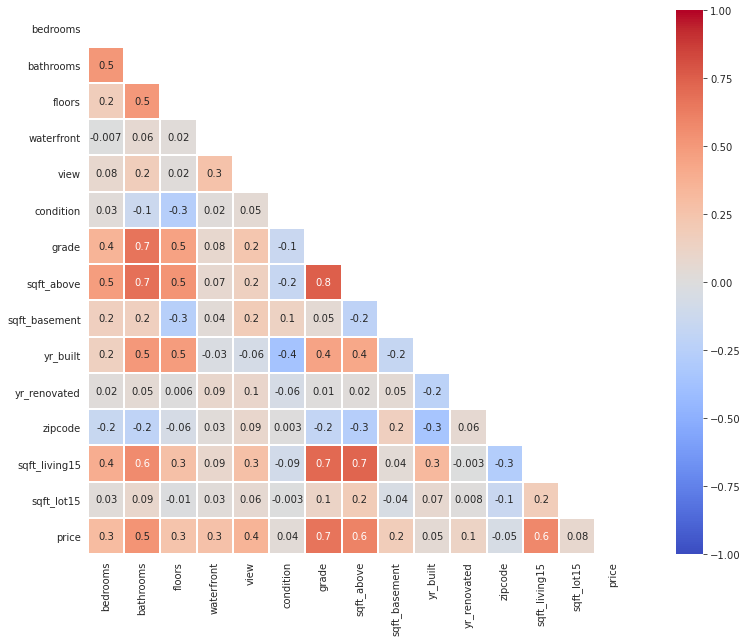

In [31]:
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 10))
    ax = sns.heatmap(data.corr(), mask=mask,
                     square=True, annot=True, linewidths=1, cmap="coolwarm",
                     vmax = 1, vmin = -1, fmt='.1g')

We can see that the variables, which affect the price the most are:
- grade (already high correlated with the number of bathrooms, sqft_above, sqft_living15, so that I can spare those features)

Followed by:
- zipcode (negatively with other features like sqft_living15 and year_built)
- view
- floors
- number of bedrooms
- waterfront


Since grade and zipcode appear to be correlated with the price, I'll proceed to create two groups of zipcode (expensive and cheaper areas) and change the data type of the column grade to categorical and use the hot-encoder to create dummies for every value.

# WRANGLING

## Zipcodes

The feature zipcode is really populated with 70 different values. In this case we will calculate the average price for all the houses and group the zipcodes in two groups. On the one hand we'll have one group with the zipcodes where the prices are equal to or greater than the average price. In the other group we would have the rest.

**Calculating average price for all the houses**

In [32]:
data['price'].mean()

540296.5735055795

**Creating a dataframe just with the zipcode and price**

In [33]:
zipgr = pd.DataFrame(data[['zipcode', 'price']])
zipgr.columns = ['zipcode', 'price']
zipgr

,zipcode,price
0,98178,221900
1,98125,538000
2,98028,180000
3,98136,604000
4,98074,510000
...,...,...
21592,98103,360000
21593,98146,400000
21594,98144,402101
21595,98027,400000


**Getting information about new zipcode dataframe**

In [34]:
zipgr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   zipcode  21597 non-null  int64
 1   price    21597 non-null  int64
dtypes: int64(2)
memory usage: 337.6 KB


**Changing type of zipcode to categorical**

In [35]:
zipgr = zipgr.astype({'zipcode': 'object'})

**Grouping by zipcode and calculating the average price for that area**

In [36]:
zipgr = zipgr.groupby('zipcode', as_index=False).agg({"price": "mean"})
zipgr = zipgr.rename(columns={'price': 'avg_price'})
zipgr

,zipcode,avg_price
0,98001,2.811949e+05
1,98002,2.342840e+05
2,98003,2.941113e+05
3,98004,1.356524e+06
4,98005,8.102897e+05
...,...,...
65,98177,6.764194e+05
66,98178,3.106128e+05
67,98188,2.890783e+05
68,98198,3.028967e+05


**Creating a variable with the zipcodes which average price is lower than the average price**

In [37]:
group_zipcode_df = zipgr[zipgr['avg_price']<data['price'].mean()]
group_zipcode = list(group_zipcode_df['zipcode'])
group_zipcode

[98001,
 98002,
 98003,
 98010,
 98011,
 98014,
 98019,
 98022,
 98023,
 98028,
 98030,
 98031,
 98032,
 98034,
 98038,
 98042,
 98045,
 98055,
 98056,
 98058,
 98059,
 98065,
 98070,
 98092,
 98106,
 98108,
 98118,
 98125,
 98126,
 98133,
 98146,
 98148,
 98155,
 98166,
 98168,
 98178,
 98188,
 98198]

**Creating a function to separate the zipcodes (expensive vs. cheap area) in the data**

In [38]:
def clean_zipcode(x):
    if x in group_zipcode:
        return 'cheap'
    else:
        return 'expensive'

data['zipcode'] = list(map(clean_zipcode, data['zipcode']))

In [39]:
data['zipcode'].value_counts()

cheap        11668
expensive     9929
Name: zipcode, dtype: int64

## Grade

**Checking the values in column grade**

In [40]:
data['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

<AxesSubplot:xlabel='grade', ylabel='Density'>

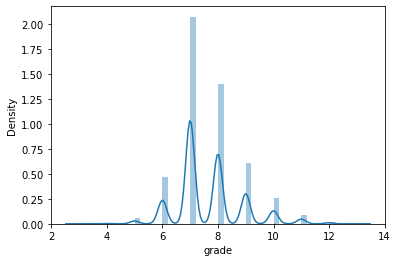

In [41]:
sns.distplot(data['grade'])

**Binning the numerical column grade**

In [42]:
grade_labels = ['Low', 'Average', 'High']
data['grade_new'] = pd.cut(data['grade'],3, labels=grade_labels)
data['grade_new'].value_counts()

Average    17654
Low         2308
High        1635
Name: grade_new, dtype: int64

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   house_id       21597 non-null  object  
 1   bedrooms       21597 non-null  int64   
 2   bathrooms      21597 non-null  float64 
 3   floors         21597 non-null  float64 
 4   waterfront     21597 non-null  int64   
 5   view           21597 non-null  int64   
 6   condition      21597 non-null  int64   
 7   grade          21597 non-null  int64   
 8   sqft_above     21597 non-null  int64   
 9   sqft_basement  21597 non-null  int64   
 10  yr_built       21597 non-null  int64   
 11  yr_renovated   21597 non-null  int64   
 12  zipcode        21597 non-null  object  
 13  sqft_living15  21597 non-null  int64   
 14  sqft_lot15     21597 non-null  int64   
 15  price          21597 non-null  int64   
 16  trans_id       21597 non-null  object  
 17  grade_new      21597 non-null  

**Changing the data type of grade and zipcode**

In [44]:
data = data.astype({'grade_new': 'object' ,'zipcode': 'object'})

## New variable with selected features

**Creating a new variable for the selected features**

In [45]:
data2 = data[['grade_new','view', 'bedrooms', 'waterfront', 'floors', 'zipcode', 'price']]

## One-hot-encoder

**Applying hot-encoder to grade and zipcode**

In [46]:
data3 = data2.copy()

In [47]:
data3_colums = data2.select_dtypes(include = object).columns
data3_colums

Index(['grade_new', 'zipcode'], dtype='object')

In [48]:
data3 = pd.get_dummies(data3, columns = data3_colums)
data3

,view,bedrooms,waterfront,floors,price,grade_new_Average,grade_new_High,grade_new_Low,zipcode_cheap,zipcode_expensive
0,0,3,0,1.0,221900,1,0,0,1,0
1,0,3,0,2.0,538000,1,0,0,1,0
2,0,2,0,1.0,180000,0,0,1,1,0
3,0,4,0,1.0,604000,1,0,0,0,1
4,0,3,0,1.0,510000,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
21592,0,3,0,3.0,360000,1,0,0,0,1
21593,0,4,0,2.0,400000,1,0,0,1,0
21594,0,2,0,2.0,402101,1,0,0,0,1
21595,0,3,0,2.0,400000,1,0,0,0,1


## Spliting numerical and categorical data

**Spliting the numerical data**

In [49]:
numericals = data3.select_dtypes(np.number)

In [50]:
numericals.head()

,view,bedrooms,waterfront,floors,price,grade_new_Average,grade_new_High,grade_new_Low,zipcode_cheap,zipcode_expensive
0,0,3,0,1.0,221900,1,0,0,1,0
1,0,3,0,2.0,538000,1,0,0,1,0
2,0,2,0,1.0,180000,0,0,1,1,0
3,0,4,0,1.0,604000,1,0,0,0,1
4,0,3,0,1.0,510000,1,0,0,0,1


In [51]:
numericals.describe()

,view,bedrooms,waterfront,floors,price,grade_new_Average,grade_new_High,grade_new_Low,zipcode_cheap,zipcode_expensive
count,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,0.098254,3.373200,0.007547,1.494096,5.402966e+05,0.817428,0.075705,0.106867,0.540260,0.459740
std,0.297665,0.926299,0.086549,0.539683,3.673681e+05,0.386324,0.264532,0.308951,0.498388,0.498388
min,0.000000,1.000000,0.000000,1.000000,7.800000e+04,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,0.000000,1.000000,3.220000e+05,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,1.500000,4.500000e+05,1.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,4.000000,0.000000,2.000000,6.450000e+05,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,33.000000,1.000000,3.500000,7.700000e+06,1.000000,1.000000,1.000000,1.000000,1.000000


**Spliting discrete from continuous**

In [52]:
#the discrete variables will be likely the ones with less unique values
numericals.nunique()

view                    2
bedrooms               12
waterfront              2
floors                  6
price                3622
grade_new_Average       2
grade_new_High          2
grade_new_Low           2
zipcode_cheap           2
zipcode_expensive       2
dtype: int64

In [53]:
discrete = [i for i in numericals if (len(numericals[i].unique()) < (numericals.shape[0] * 0.01))]

In [54]:
discrete

['view',
 'bedrooms',
 'waterfront',
 'floors',
 'grade_new_Average',
 'grade_new_High',
 'grade_new_Low',
 'zipcode_cheap',
 'zipcode_expensive']

In [55]:
continuous = list(numericals.drop(columns = discrete).columns)

In [56]:
continuous

['price']

**Visualizing with histograms to check distribution**

In [57]:
def df_hist(df):
    sns.set(rc={'figure.figsize':(16,8)})
    for i, col in enumerate(df):
        plt.figure(i)
        sns.distplot(df[col], color = list(BASE_COLORS.keys())[3])
        
    plt.show()

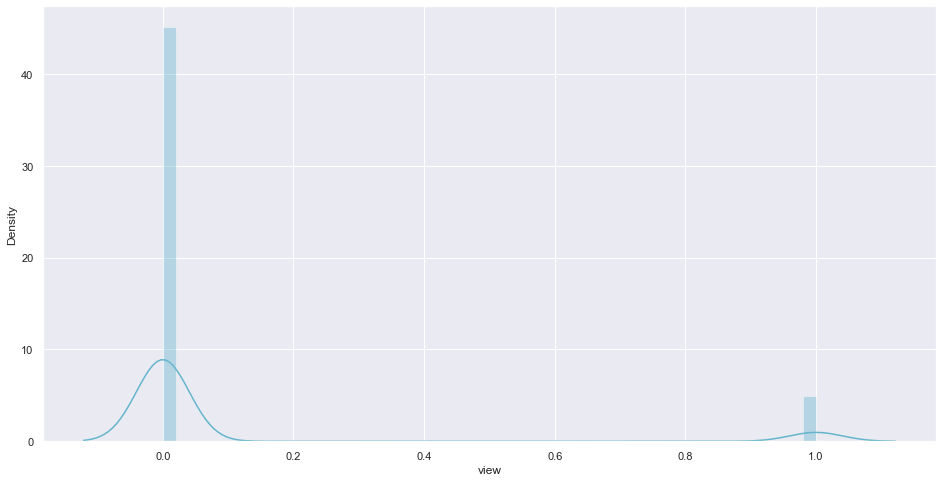

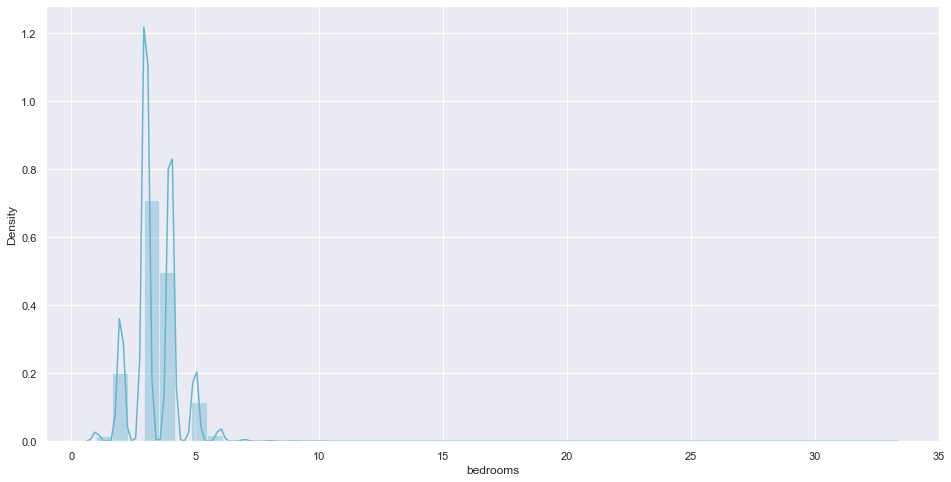

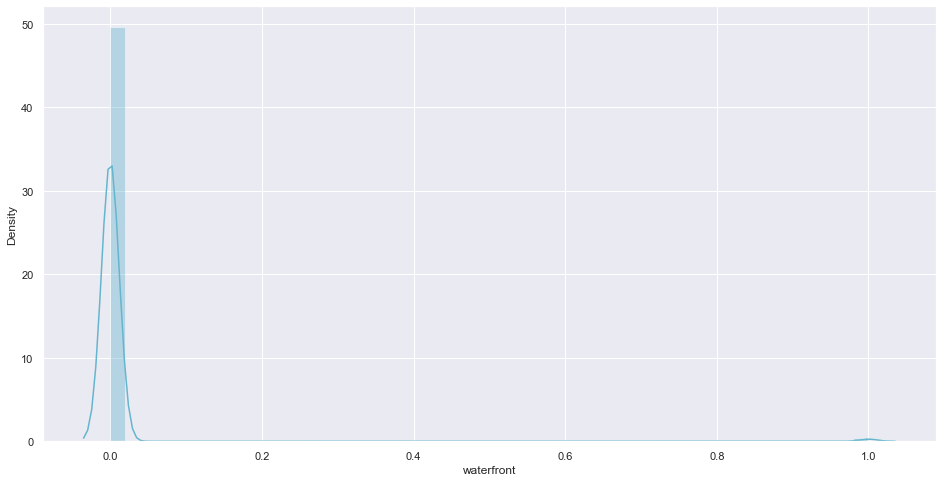

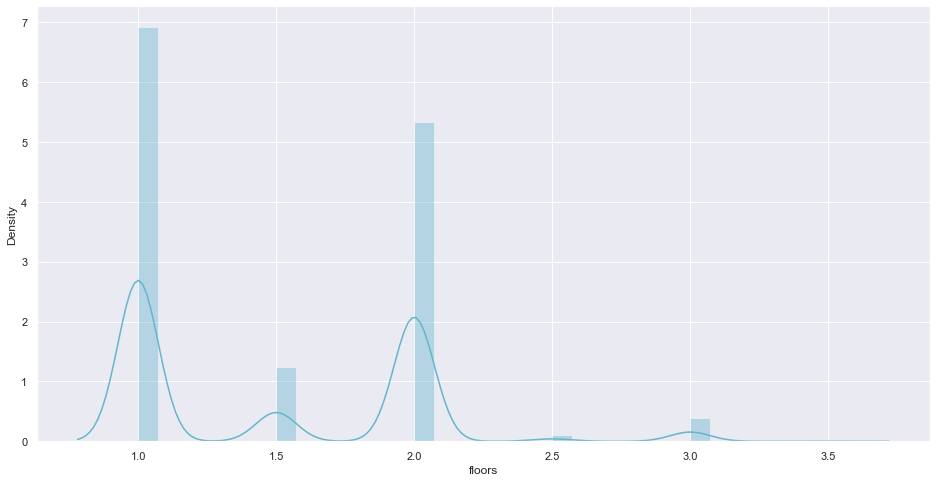

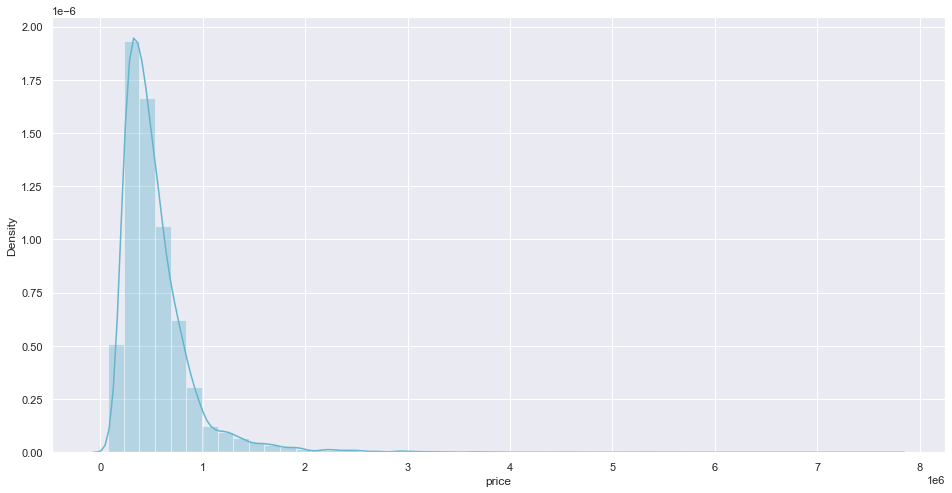

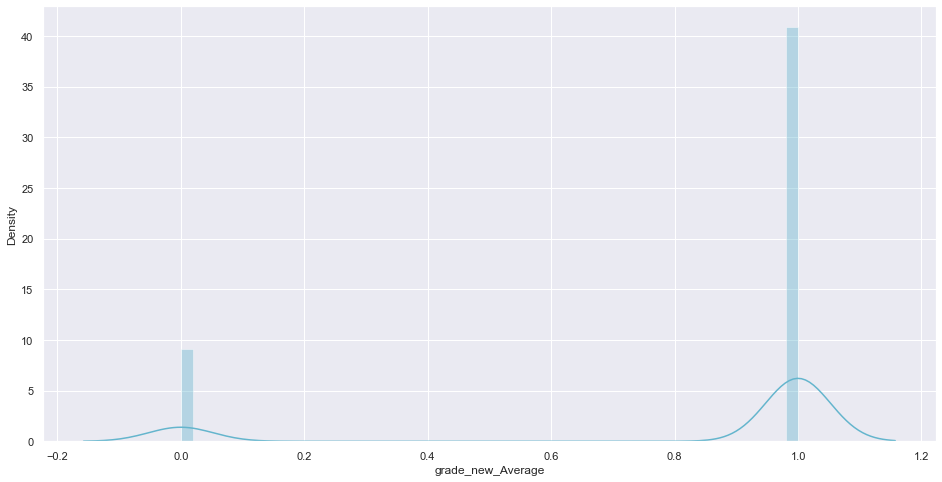

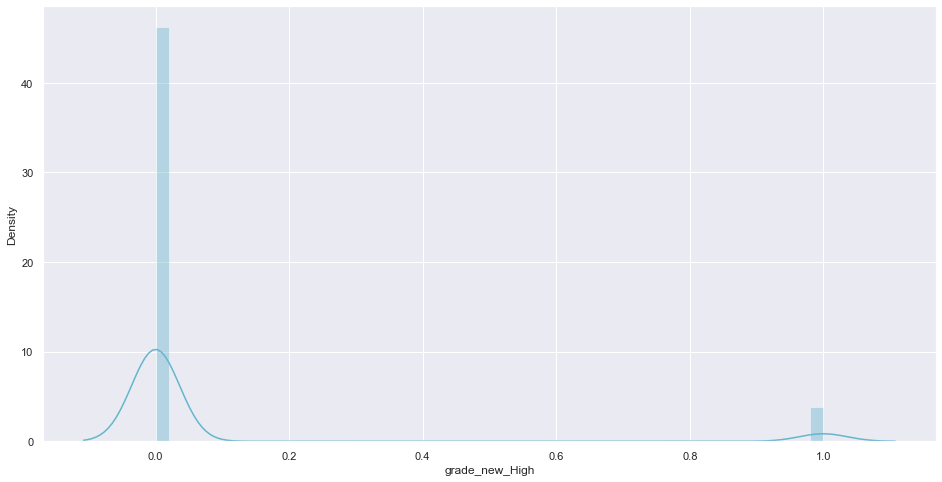

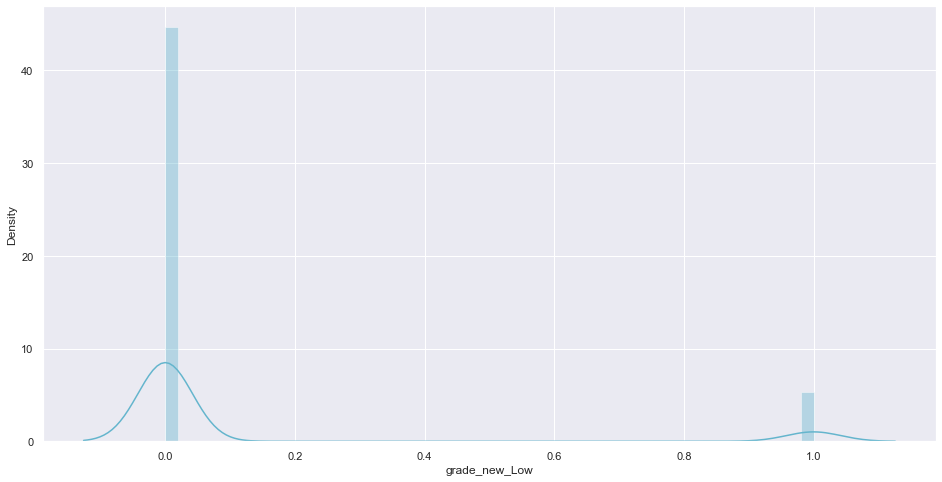

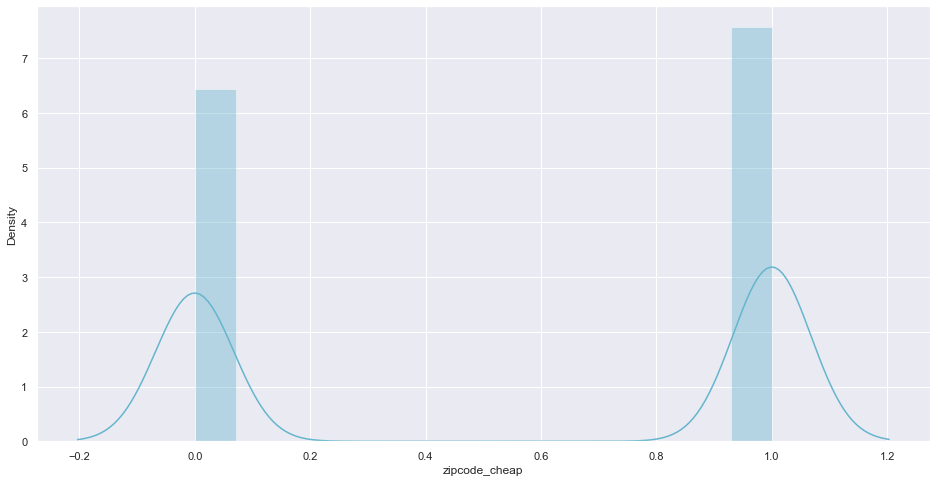

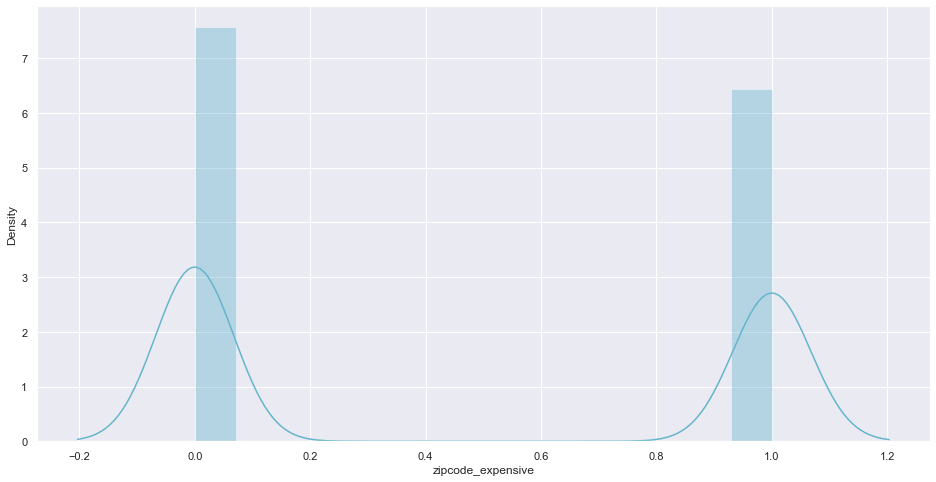

In [58]:
df_hist(numericals)

As the histograms show the features bedrooms, and floors don't present a normal distribution. To check if there are outliers, I'll use some boxplots.

**Boxplot Bedrooms**

<AxesSubplot:xlabel='bedrooms'>

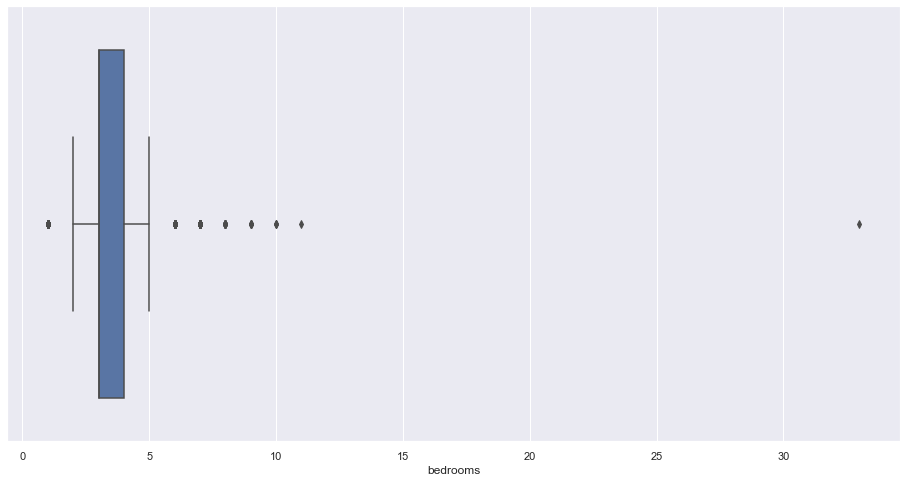

In [59]:
sns.boxplot(x=data3['bedrooms'])

In [60]:
data3['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

**Boxplot Floors**

<AxesSubplot:xlabel='floors'>

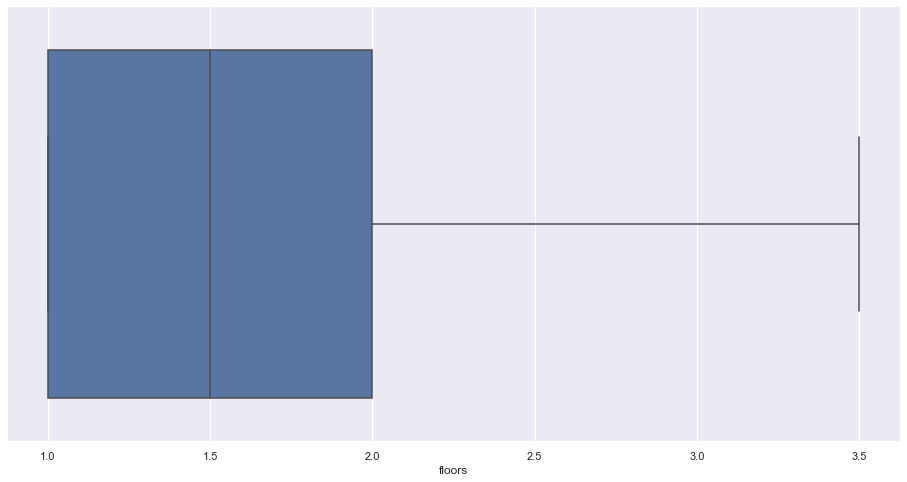

In [61]:
sns.boxplot(x=data3['floors'])

In [62]:
data3['floors'].value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

**Spliting the categorical data**

In [63]:
categorical = data3.select_dtypes(object)

In [64]:
categorical.nunique()

Series([], dtype: float64)

In [65]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   view               21597 non-null  int64  
 1   bedrooms           21597 non-null  int64  
 2   waterfront         21597 non-null  int64  
 3   floors             21597 non-null  float64
 4   price              21597 non-null  int64  
 5   grade_new_Average  21597 non-null  uint8  
 6   grade_new_High     21597 non-null  uint8  
 7   grade_new_Low      21597 non-null  uint8  
 8   zipcode_cheap      21597 non-null  uint8  
 9   zipcode_expensive  21597 non-null  uint8  
dtypes: float64(1), int64(4), uint8(5)
memory usage: 949.2 KB


#### Before removing the outliers from bedrooms and floors, I will check the accuracy of the data with 2 different models

# TESTING

# Machine Learning: 2 models and their evaluations (with outliers)

## Linear regression 

In [66]:
X_train, X_test, y_train, y_test = train_test_split(data3.drop(columns = "price"),
                                                    data3.price, test_size = 0.2, random_state=100)

In [67]:
lm = linear_model.LinearRegression()
lm_model = lm.fit(X_train,y_train)

In [68]:
lm_predictions = lm_model.predict(X_test)

In [69]:
MAE_lr = mean_absolute_error(y_test,lm_predictions)
MSE_lr = mean_squared_error(y_test,lm_predictions)
RMSE_lr = np.sqrt(MSE_lr)
R2_lr = r2_score(y_test,lm_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE_lr))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE_lr))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE_lr))
print("The R2 of the model in the test set is: %4.2f" % (R2_lr))

The mean absolute error of the model in the test set is: 142494.02
The mean squared error of the model in the test set is: 63206703238.82
The root mean squared error of the model in the test set is: 251409.43
The R2 of the model in the test set is: 0.57


## Support Vector Regression (SVR)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(data3.drop(columns = "price"),
                                                    data3.price, test_size = 0.2, random_state=100)

In [71]:
SupportVectorRegModel = SVR()
SVR_model = SupportVectorRegModel.fit(X_train,y_train)

In [72]:
SVR_predictions = SVR_model.predict(X_test)

In [73]:
MAE_svr = mean_absolute_error(y_test,SVR_predictions)
MSE_svr = mean_squared_error(y_test,SVR_predictions)
RMSE_svr = np.sqrt(MSE_svr)
R2_svr = r2_score(y_test,SVR_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE_svr))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE_svr))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE_svr))
print("The R2 of the model in the test set is: %4.2f" % (R2_svr))

The mean absolute error of the model in the test set is: 222645.15
The mean squared error of the model in the test set is: 153721280818.92
The root mean squared error of the model in the test set is: 392073.06
The R2 of the model in the test set is: -0.05


#### Now I'll deal with the outliers normalizing them and I will check the accuracy of the data with 3 different models

# Machine Learning: 2 models and their evaluations (removed outliers)

In [74]:
data3.head()

,view,bedrooms,waterfront,floors,price,grade_new_Average,grade_new_High,grade_new_Low,zipcode_cheap,zipcode_expensive
0,0,3,0,1.0,221900,1,0,0,1,0
1,0,3,0,2.0,538000,1,0,0,1,0
2,0,2,0,1.0,180000,0,0,1,1,0
3,0,4,0,1.0,604000,1,0,0,0,1
4,0,3,0,1.0,510000,1,0,0,0,1


**Removing outliers from bedrooms**

In [75]:
data3['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [76]:
data4 = data3.copy()

In [77]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   view               21597 non-null  int64  
 1   bedrooms           21597 non-null  int64  
 2   waterfront         21597 non-null  int64  
 3   floors             21597 non-null  float64
 4   price              21597 non-null  int64  
 5   grade_new_Average  21597 non-null  uint8  
 6   grade_new_High     21597 non-null  uint8  
 7   grade_new_Low      21597 non-null  uint8  
 8   zipcode_cheap      21597 non-null  uint8  
 9   zipcode_expensive  21597 non-null  uint8  
dtypes: float64(1), int64(4), uint8(5)
memory usage: 949.2 KB


In [78]:
data4.drop(data4[data4.bedrooms > 6].index, inplace=True)

In [79]:
data4['bedrooms'].value_counts()

3    9824
4    6882
2    2760
5    1601
6     272
1     196
Name: bedrooms, dtype: int64

**Removing outliers from floors**

In [80]:
data4['floors'].value_counts()

1.0    10657
2.0     8203
1.5     1902
3.0      610
2.5      157
3.5        6
Name: floors, dtype: int64

In [81]:
data4.drop(data4[data4.floors > 2.0].index, inplace=True)

In [82]:
data4['floors'].value_counts()

1.0    10657
2.0     8203
1.5     1902
Name: floors, dtype: int64

## Linear regression 

In [83]:
X_train, X_test, y_train, y_test = train_test_split(data4.drop(columns = "price"),
                                                    data4.price, test_size = 0.2, random_state=100)

In [84]:
lm = linear_model.LinearRegression()
lm_model = lm.fit(X_train,y_train)

In [85]:
lm_predictions = lm_model.predict(X_test)

In [86]:
MAE_lr = mean_absolute_error(y_test,lm_predictions)
MSE_lr = mean_squared_error(y_test,lm_predictions)
RMSE_lr = np.sqrt(MSE_lr)
R2_lr = r2_score(y_test,lm_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE_lr))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE_lr))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE_lr))
print("The R2 of the model in the test set is: %4.2f" % (R2_lr))

The mean absolute error of the model in the test set is: 140115.94
The mean squared error of the model in the test set is: 49817387182.17
The root mean squared error of the model in the test set is: 223198.09
The R2 of the model in the test set is: 0.59


## Support Vector Regression (SVR)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(data4.drop(columns = "price"),
                                                    data4.price, test_size = 0.2, random_state=100)

In [88]:
SupportVectorRegModel = SVR()
SVR_model = SupportVectorRegModel.fit(X_train,y_train)

In [89]:
SVR_predictions = SVR_model.predict(X_test)

In [90]:
MAE_svr = mean_absolute_error(y_test,SVR_predictions)
MSE_svr = mean_squared_error(y_test,SVR_predictions)
RMSE_svr = np.sqrt(MSE_svr)
R2_svr = r2_score(y_test,SVR_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE_svr))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE_svr))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE_svr))
print("The R2 of the model in the test set is: %4.2f" % (R2_svr))

The mean absolute error of the model in the test set is: 217563.88
The mean squared error of the model in the test set is: 129146917250.42
The root mean squared error of the model in the test set is: 359370.17
The R2 of the model in the test set is: -0.06


# Extra question

## Which factors are responsible for higher property value (650K dollars and above)?

**Loading the data into a new variable**

In [91]:
df = pd.read_csv('regression_data_clean.csv')

## The exploring section stays like in the first part of notebook

# CLEANING

**Rename columns id and add new column trans_id**

In [92]:
df = df.rename(columns={'id': 'house_id'})

In [93]:
df['trans_id'] = range(0, 0+len(data))

**Dropping columns date, sqft_living, sqft_lot, lat and long**

In [94]:
df.drop(['date', 'sqft_living', 'sqft_lot', 'lat', 'long'], axis=1, inplace=True)

**Changing data types**

In [95]:
df = df.astype({'sqft_basement': 'bool' ,'yr_renovated': 'bool', 'view': 'bool', 'house_id': 'object' ,'trans_id': 'object'})

Rechanging the booleans into integers to get 0 and 1 values.

In [96]:
df = df.astype({'sqft_basement': 'int64' ,'yr_renovated': 'int64', 'view': 'int64'})

## Price above 650K

**Creating a dataframe just with the houses as of $650K**

In [97]:
highpricedf = df[(df['price'] >= 650000)]

In [98]:
highpricedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5322 entries, 5 to 21590
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   house_id       5322 non-null   object 
 1   bedrooms       5322 non-null   int64  
 2   bathrooms      5322 non-null   float64
 3   floors         5322 non-null   float64
 4   waterfront     5322 non-null   int64  
 5   view           5322 non-null   int64  
 6   condition      5322 non-null   int64  
 7   grade          5322 non-null   int64  
 8   sqft_above     5322 non-null   int64  
 9   sqft_basement  5322 non-null   int64  
 10  yr_built       5322 non-null   int64  
 11  yr_renovated   5322 non-null   int64  
 12  zipcode        5322 non-null   int64  
 13  sqft_living15  5322 non-null   int64  
 14  sqft_lot15     5322 non-null   int64  
 15  price          5322 non-null   int64  
 16  trans_id       5322 non-null   object 
dtypes: float64(2), int64(13), object(2)
memory usage: 7

In [99]:
highpricedf.shape

(5322, 17)

**Plot a correlation matrix**

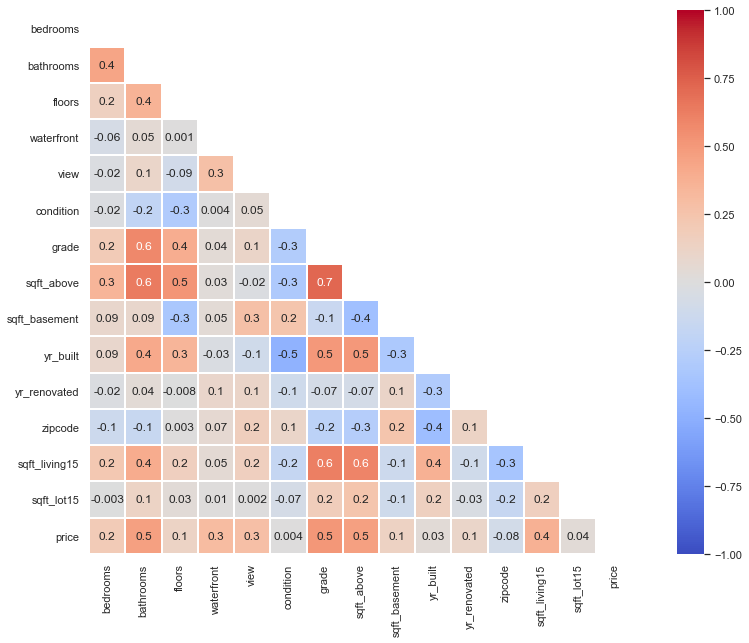

In [100]:
mask = np.zeros_like(highpricedf.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 10))
    ax = sns.heatmap(highpricedf.corr(), mask=mask,
                     square=True, annot=True, linewidths=1, cmap="coolwarm",
                     vmax = 1, vmin = -1, fmt='.1g')

The variables, which affect the price taking into account all the houses were:
- grade (high correlated with the number of bathrooms, sqft_above, sqft_living15)

Followed by:
- zipcode (negatively with other features like sqft_living15 and year_built)
- view
- number of bedrooms
- floors
- waterfront

As we can see now, the factors that are responsible for prices of $650K and above are the same as for the dataframe containing all the house. Therefore the machine learning models used above should fit also for the more expensive houses.